# KNN Classification


import pandas as pd

## Prepare X and y

In [2]:
import pandas as pd

train_path = "../../data/processed/loan-10k-preprocessed-train.csv"
test_path  = "../../data/processed/loan-10k-preprocessed-test.csv"
sol_path   = "../../data/processed/loan-10k-preprocessed-sol.csv"

train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)
sol_df   = pd.read_csv(sol_path)  

In [3]:
target_col = "grade"
id_col = "ID"

X_train = train_df.drop(columns=[target_col, id_col])
y_train = train_df[target_col]

X_test = test_df.drop(columns=[id_col])

## Training and Evaluating based on KNN

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# 1. Hold-Out split (80/20) from training set
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

results = []

k_values = [1, 3, 5, 7, 9, 11, 15, 21, 31]

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    
    # Fit
    model.fit(X_tr, y_tr)
    
    # Hold-out predictions
    val_pred = model.predict(X_val)
    val_acc = accuracy_score(y_val, val_pred)
    
    # Cross-Val accuracy
    cv_acc = cross_val_score(model, X_train, y_train, cv=5).mean()

    results.append({
        "k": k,
        "holdout_acc": val_acc,
        "cv_acc": cv_acc
    })

res_df = pd.DataFrame(results)
print(res_df)

    k  holdout_acc  cv_acc
0   1       0.3985  0.3982
1   3       0.3890  0.3911
2   5       0.4095  0.4270
3   7       0.4140  0.4325
4   9       0.4190  0.4369
5  11       0.4255  0.4437
6  15       0.4310  0.4502
7  21       0.4465  0.4594
8  31       0.4600  0.4614


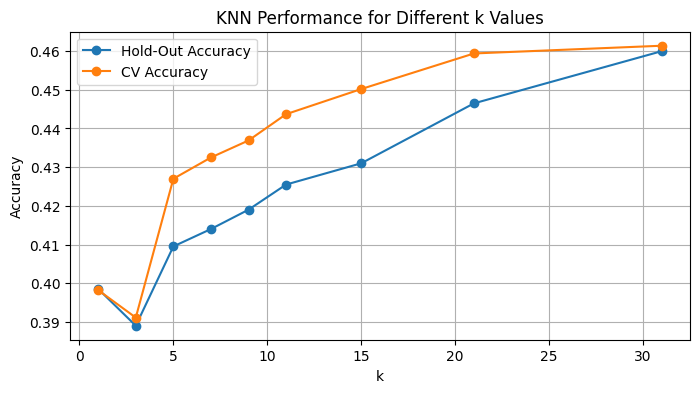

In [5]:
plt.figure(figsize=(8,4))
plt.plot(res_df["k"], res_df["holdout_acc"], marker="o", label="Hold-Out Accuracy")
plt.plot(res_df["k"], res_df["cv_acc"], marker="o", label="CV Accuracy")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("KNN Performance for Different k Values")
plt.legend()
plt.grid(True)
plt.show()

In [6]:
best_k = res_df.sort_values("cv_acc", ascending=False).iloc[0]["k"]
model_best = KNeighborsClassifier(n_neighbors=int(best_k))
model_best.fit(X_train, y_train)

y_pred = model_best.predict(X_train)

print("Classification Report:")
print(classification_report(y_train, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.64      0.66      1821
           1       0.52      0.62      0.57      2881
           2       0.47      0.66      0.55      2989
           3       0.43      0.16      0.24      1449
           4       0.50      0.03      0.05       621
           5       0.50      0.01      0.01       182
           6       0.00      0.00      0.00        57

    accuracy                           0.52     10000
   macro avg       0.44      0.30      0.30     10000
weighted avg       0.52      0.52      0.49     10000



/Users/simon/Library/Python/3.11/lib/python/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/simon/Library/Python/3.11/lib/python/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/simon/Library/Python/3.11/lib/python/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", 

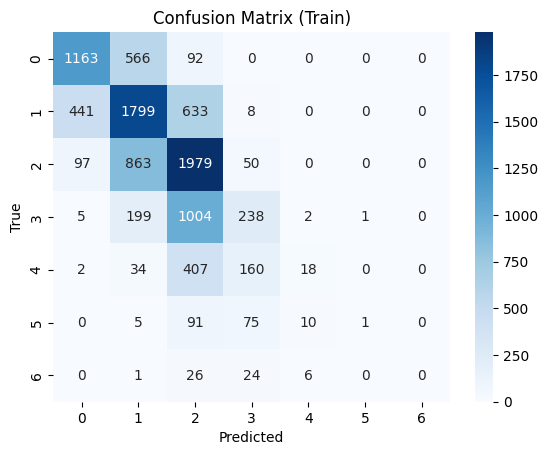

In [7]:
import seaborn as sns

cm = confusion_matrix(y_train, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Train)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

## Training and Evaluating based on Decision Trees

,max_depth,min_samples_split,min_samples_leaf,criterion,holdout_acc,holdout_f1,cv_acc,cv_f1
0,NaN,2,10,gini,0.9710,0.836082,0.9694,0.845633
1,NaN,10,10,gini,0.9710,0.836082,0.9694,0.845633
2,NaN,20,10,gini,0.9710,0.836082,0.9694,0.845633
3,15.0,2,10,gini,0.9710,0.836082,0.9694,0.845633
4,15.0,10,10,gini,0.9710,0.836082,0.9694,0.845633
5,15.0,20,10,gini,0.9710,0.836082,0.9694,0.845633
6,10.0,2,5,gini,0.9695,0.825860,0.9716,0.843856
7,10.0,10,5,gini,0.9695,0.825860,0.9716,0.843856
8,NaN,2,5,gini,0.9675,0.820545,0.9713,0.842011
9,NaN,10,5,gini,0.9675,0.820545,0.9713,0.842011


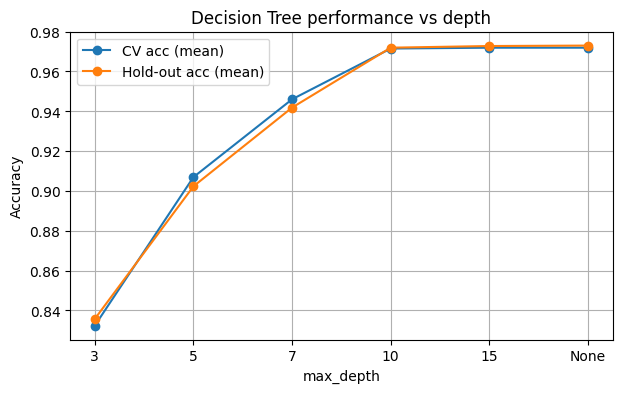

Chosen configs: [{'max_depth': nan, 'min_samples_split': 2, 'min_samples_leaf': 10, 'criterion': 'gini', 'holdout_acc': 0.971, 'holdout_f1': 0.8360820785972791, 'cv_acc': 0.9693999999999999, 'cv_f1': 0.8456326855397871}, {'max_depth': nan, 'min_samples_split': 10, 'min_samples_leaf': 10, 'criterion': 'gini', 'holdout_acc': 0.971, 'holdout_f1': 0.8360820785972791, 'cv_acc': 0.9693999999999999, 'cv_f1': 0.8456326855397871}, {'max_depth': nan, 'min_samples_split': 20, 'min_samples_leaf': 10, 'criterion': 'gini', 'holdout_acc': 0.971, 'holdout_f1': 0.8360820785972791, 'cv_acc': 0.9693999999999999, 'cv_f1': 0.8456326855397871}]

Config: {'max_depth': nan, 'min_samples_split': 2, 'min_samples_leaf': 10, 'criterion': 'gini', 'holdout_acc': 0.971, 'holdout_f1': 0.8360820785972791, 'cv_acc': 0.9693999999999999, 'cv_f1': 0.8456326855397871}
Hold-out acc: 0.971
Hold-out f1_macro: 0.8360820785972791
              precision    recall  f1-score   support

           0       0.99      0.98      0.99 

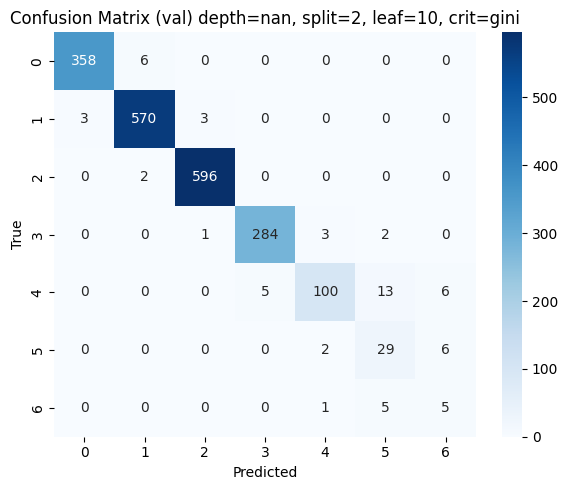

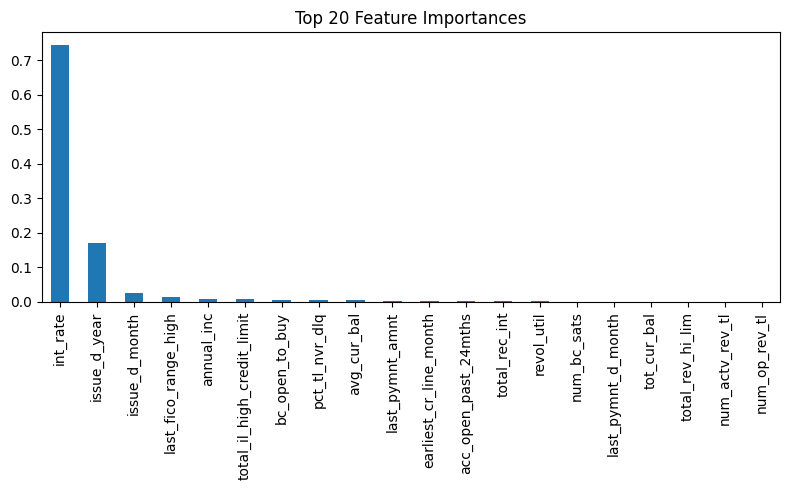


Config: {'max_depth': nan, 'min_samples_split': 10, 'min_samples_leaf': 10, 'criterion': 'gini', 'holdout_acc': 0.971, 'holdout_f1': 0.8360820785972791, 'cv_acc': 0.9693999999999999, 'cv_f1': 0.8456326855397871}
Hold-out acc: 0.971
Hold-out f1_macro: 0.8360820785972791
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       364
           1       0.99      0.99      0.99       576
           2       0.99      1.00      0.99       598
           3       0.98      0.98      0.98       290
           4       0.94      0.81      0.87       124
           5       0.59      0.78      0.67        37
           6       0.29      0.45      0.36        11

    accuracy                           0.97      2000
   macro avg       0.83      0.86      0.84      2000
weighted avg       0.98      0.97      0.97      2000



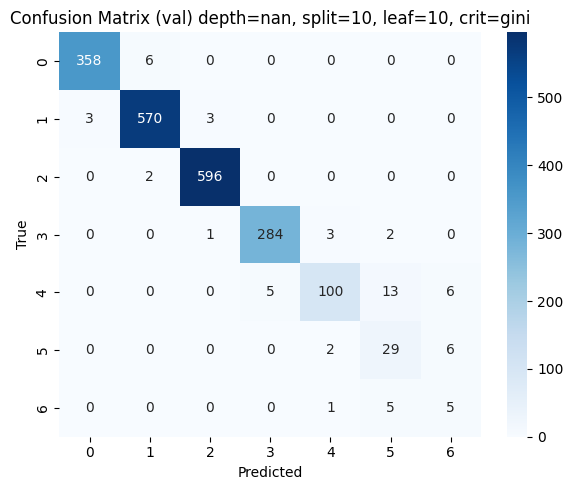

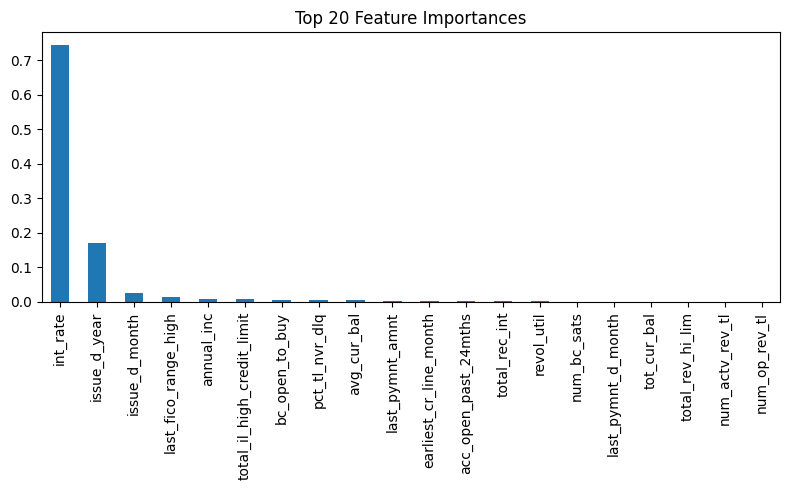


Config: {'max_depth': nan, 'min_samples_split': 20, 'min_samples_leaf': 10, 'criterion': 'gini', 'holdout_acc': 0.971, 'holdout_f1': 0.8360820785972791, 'cv_acc': 0.9693999999999999, 'cv_f1': 0.8456326855397871}
Hold-out acc: 0.971
Hold-out f1_macro: 0.8360820785972791
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       364
           1       0.99      0.99      0.99       576
           2       0.99      1.00      0.99       598
           3       0.98      0.98      0.98       290
           4       0.94      0.81      0.87       124
           5       0.59      0.78      0.67        37
           6       0.29      0.45      0.36        11

    accuracy                           0.97      2000
   macro avg       0.83      0.86      0.84      2000
weighted avg       0.98      0.97      0.97      2000



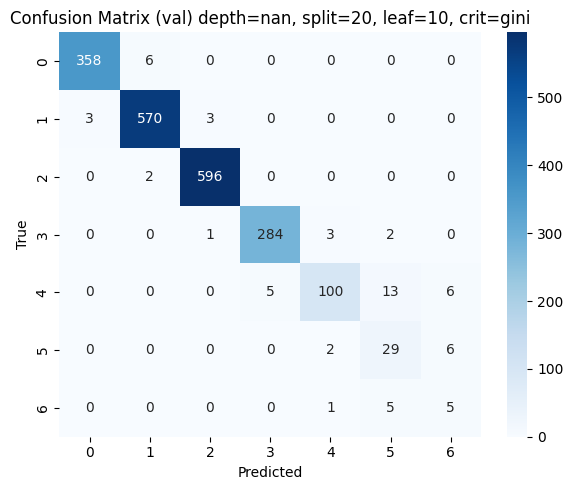

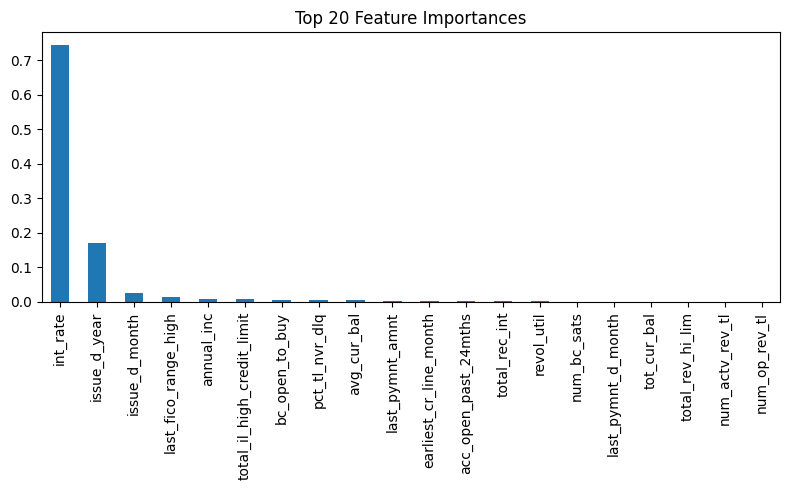


TEST accuracy (DT): 0.2962
TEST f1_macro (DT): 0.06528974805475345
[[   0    0    0    0    0    0    0]
 [1811 2962 2881 1443  561  204  138]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.30      0.46     10000
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0

    accuracy                           0.30     10000
   macro avg       0.14      0.04      0.07     10000
weighted avg       1.00      0.30      0.46     10000



/Users/simon/Library/Python/3.11/lib/python/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/simon/Library/Python/3.11/lib/python/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/simon/Library/Python/3.11/lib/python/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

target_col = "grade"
id_col = "ID"

feature_cols = train_df.select_dtypes(include=[np.number]).columns.tolist()
feature_cols = [c for c in feature_cols if c != target_col]
if id_col in feature_cols:
    feature_cols.remove(id_col)

X = train_df[feature_cols]
y = train_df[target_col].astype(int)
X_test = test_df[feature_cols]

X_tr, X_val, y_tr, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

def _safe_depth(val):
    import numpy as np, pandas as pd
    return None if (val is None or (isinstance(val, float) and np.isnan(val)) or pd.isna(val)) else int(val)

param_grid = []
for depth in [None, 3, 5, 7, 10, 15]:
    for minsplit in [2, 10, 20]:
        for minleaf in [1, 5, 10]:
            for crit in ["gini", "entropy"]:
                param_grid.append({"max_depth": depth, "min_samples_split": minsplit, "min_samples_leaf": minleaf, "criterion": crit})

rows = []
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for p in param_grid:
    clf = DecisionTreeClassifier(
        max_depth=_safe_depth(p["max_depth"]),
        min_samples_split=int(p["min_samples_split"]),
        min_samples_leaf=int(p["min_samples_leaf"]),
        criterion=p["criterion"],
        class_weight="balanced",
        random_state=42
    )
    clf.fit(X_tr, y_tr)
    val_pred = clf.predict(X_val)
    hold_acc = accuracy_score(y_val, val_pred)
    hold_f1 = f1_score(y_val, val_pred, average="macro")
    cv_acc = cross_val_score(clf, X, y, cv=cv, scoring="accuracy", n_jobs=-1).mean()
    cv_f1 = cross_val_score(clf, X, y, cv=cv, scoring="f1_macro", n_jobs=-1).mean()
    rows.append({**p, "holdout_acc": hold_acc, "holdout_f1": hold_f1, "cv_acc": cv_acc, "cv_f1": cv_f1})

res_dt = pd.DataFrame(rows).sort_values(["cv_f1","cv_acc","holdout_f1","holdout_acc"], ascending=False).reset_index(drop=True)
display(res_dt.head(12))

depth_labels = res_dt["max_depth"].apply(lambda d: "None" if pd.isna(d) else int(d))
agg = res_dt.assign(depth_label=depth_labels).groupby("depth_label")[["cv_acc","holdout_acc"]].mean().reset_index()
plt.figure(figsize=(7,4))
plt.plot(agg["depth_label"].astype(str), agg["cv_acc"], marker="o", label="CV acc (mean)")
plt.plot(agg["depth_label"].astype(str), agg["holdout_acc"], marker="o", label="Hold-out acc (mean)")
plt.xlabel("max_depth"); plt.ylabel("Accuracy"); plt.title("Decision Tree performance vs depth")
plt.legend(); plt.grid(True); plt.show()

cands = (
    res_dt
    .drop_duplicates(subset=["max_depth","min_samples_split","min_samples_leaf","criterion"])
    .head(3)
    .to_dict(orient="records")
)
print("Chosen configs:", cands)

models = []
for p in cands:
    clf = DecisionTreeClassifier(
        max_depth=_safe_depth(p["max_depth"]),
        min_samples_split=int(p["min_samples_split"]),
        min_samples_leaf=int(p["min_samples_leaf"]),
        criterion=p["criterion"],
        class_weight="balanced",
        random_state=42
    )
    clf.fit(X_tr, y_tr)
    y_pred = clf.predict(X_val)
    print("\nConfig:", p)
    print("Hold-out acc:", accuracy_score(y_val, y_pred))
    print("Hold-out f1_macro:", f1_score(y_val, y_pred, average="macro"))
    print(classification_report(y_val, y_pred))
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix (val) depth={p['max_depth']}, split={p['min_samples_split']}, leaf={p['min_samples_leaf']}, crit={p['criterion']}")
    plt.xlabel("Predicted"); plt.ylabel("True")
    plt.tight_layout(); plt.show()
    imp = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False)
    plt.figure(figsize=(8,5))
    imp.head(20).plot(kind="bar")
    plt.title("Top 20 Feature Importances")
    plt.tight_layout(); plt.show()
    models.append((p, clf))

best = res_dt.iloc[0].to_dict()
final_dt = DecisionTreeClassifier(
    max_depth=_safe_depth(best["max_depth"]),
    min_samples_split=int(best["min_samples_split"]),
    min_samples_leaf=int(best["min_samples_leaf"]),
    criterion=best["criterion"],
    class_weight="balanced",
    random_state=42
)
final_dt.fit(X, y)

if _safe_depth(best["max_depth"]) is not None and _safe_depth(best["max_depth"]) <= 5:
    plt.figure(figsize=(14,8))
    plot_tree(final_dt, feature_names=X.columns, class_names=[str(i) for i in sorted(y.unique())], filled=True, max_depth=_safe_depth(best["max_depth"]))
    plt.tight_layout(); plt.show()

test_pred_dt = final_dt.predict(X_test)

if 'sol_df' in globals():
    y_true = pd.to_numeric(sol_df["grade"], errors="coerce").to_numpy()
    y_hat = test_pred_dt.astype(int)
    print("\nTEST accuracy (DT):", accuracy_score(y_true, y_hat))
    print("TEST f1_macro (DT):", f1_score(y_true, y_hat, average="macro"))
    print(confusion_matrix(y_true, y_hat))
    print(classification_report(y_true, y_hat))

